In [5]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

Load the dataset

In [6]:
togoData = pd.read_csv("../data/togo-dapaong_qc.csv")

Get basic information

In [7]:
togoData.head()

Timestamp  GHI  DNI  DHI  ModA  ModB  Tamb    RH   WS  WSgust  \
0  2021-10-25 00:01 -1.3  0.0  0.0   0.0   0.0  24.8  94.5  0.9     1.1   
1  2021-10-25 00:02 -1.3  0.0  0.0   0.0   0.0  24.8  94.4  1.1     1.6   
2  2021-10-25 00:03 -1.3  0.0  0.0   0.0   0.0  24.8  94.4  1.2     1.4   
3  2021-10-25 00:04 -1.2  0.0  0.0   0.0   0.0  24.8  94.3  1.2     1.6   
4  2021-10-25 00:05 -1.2  0.0  0.0   0.0   0.0  24.8  94.0  1.3     1.6   

   WSstdev     WD  WDstdev   BP  Cleaning  Precipitation  TModA  TModB  \
0      0.4  227.6      1.1  977         0            0.0   24.7   24.4   
1      0.4  229.3      0.7  977         0            0.0   24.7   24.4   
2      0.3  228.5      2.9  977         0            0.0   24.7   24.4   
3      0.3  229.1      4.6  977         0            0.0   24.7   24.4   
4      0.4  227.5      1.6  977         0            0.0   24.7   24.4   

   Comments  
0       NaN  
1       NaN  
2       NaN  
3       NaN  
4       NaN

In [8]:
togoData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 525600 entries, 0 to 525599
Data columns (total 19 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Timestamp      525600 non-null  object 
 1   GHI            525600 non-null  float64
 2   DNI            525600 non-null  float64
 3   DHI            525600 non-null  float64
 4   ModA           525600 non-null  float64
 5   ModB           525600 non-null  float64
 6   Tamb           525600 non-null  float64
 7   RH             525600 non-null  float64
 8   WS             525600 non-null  float64
 9   WSgust         525600 non-null  float64
 10  WSstdev        525600 non-null  float64
 11  WD             525600 non-null  float64
 12  WDstdev        525600 non-null  float64
 13  BP             525600 non-null  int64  
 14  Cleaning       525600 non-null  int64  
 15  Precipitation  525600 non-null  float64
 16  TModA          525600 non-null  float64
 17  TModB          525600 non-nul

In [9]:
togoData.shape

(525600, 19)

summary statistics

In [10]:
togoData.describe()

GHI            DNI            DHI           ModA  \
count  525600.000000  525600.000000  525600.000000  525600.000000   
mean      230.555040     151.258469     116.444352     226.144375   
std       322.532347     250.956962     156.520714     317.346938   
min       -12.700000       0.000000       0.000000       0.000000   
25%        -2.200000       0.000000       0.000000       0.000000   
50%         2.100000       0.000000       2.500000       4.400000   
75%       442.400000     246.400000     215.700000     422.525000   
max      1424.000000    1004.500000     805.700000    1380.000000   

                ModB           Tamb             RH             WS  \
count  525600.000000  525600.000000  525600.000000  525600.000000   
mean      219.568588      27.751788      55.013160       2.368093   
std       307.932510       4.758023      28.778732       1.462668   
min         0.000000      14.900000       3.300000       0.000000   
25%         0.000000      24.200000      26.500000       1.400000   
50%         4.300000      27.200000      59.300000       2.200000   
75%       411.000000      31.100000      80.800000       3.200000   
max      1367.000000      41.400000      99.800000      16.100000   

              WSgust        WSstdev             WD        WDstdev  \
count  525600.000000  525600.000000  525600.000000  525600.000000   
mean        3.229490       0.557740     161.741845      10.559568   
std         1.882565       0.268923      91.877217       5.915490   
min         0.000000       0.000000       0.000000       0.000000   
25%         1.900000       0.400000      74.800000       6.900000   
50%         2.900000       0.500000     199.100000      10.800000   
75%         4.400000       0.700000     233.500000      14.100000   
max        23.100000       4.700000     360.000000      86.900000   

                  BP       Cleaning  Precipitation          TModA  \
count  525600.000000  525600.000000  525600.000000  525600.000000   
mean      975.915242       0.000535       0.001382      32.444403   
std         2.153977       0.023116       0.026350      10.998334   
min       968.000000       0.000000       0.000000      13.100000   
25%       975.000000       0.000000       0.000000      23.900000   
50%       976.000000       0.000000       0.000000      28.400000   
75%       977.000000       0.000000       0.000000      40.600000   
max       983.000000       1.000000       2.300000      70.400000   

               TModB  Comments  
count  525600.000000       0.0  
mean       33.543330       NaN  
std        12.769277       NaN  
min        13.100000       NaN  
25%        23.600000       NaN  
50%        28.400000       NaN  
75%        43.000000       NaN  
max        94.600000       NaN

Checking for negative values in GHI, DNI, DHI

In [11]:
print((togoData[['GHI', 'DNI', 'DHI']] < 0).sum())

GHI    257385
DNI         0
DHI         0
dtype: int64


In [12]:
togoData.columns

Index(['Timestamp', 'GHI', 'DNI', 'DHI', 'ModA', 'ModB', 'Tamb', 'RH', 'WS',
       'WSgust', 'WSstdev', 'WD', 'WDstdev', 'BP', 'Cleaning', 'Precipitation',
       'TModA', 'TModB', 'Comments'],
      dtype='object')

Looking for missing values

In [13]:
togoData.isnull().sum()

Timestamp             0
GHI                   0
DNI                   0
DHI                   0
ModA                  0
ModB                  0
Tamb                  0
RH                    0
WS                    0
WSgust                0
WSstdev               0
WD                    0
WDstdev               0
BP                    0
Cleaning              0
Precipitation         0
TModA                 0
TModB                 0
Comments         525600
dtype: int64

checking for outliers

In [14]:
#using Z_scores method
def outliers(c):
  z_scores = (togoData[c] - togoData[c].mean()) / togoData[c].std()
  outlier = togoData[np.abs(z_scores) > 3]
  print(c," outliers\n",outlier[c], "\n\n")

In [15]:
outliers("ModA")
outliers("ModB")
outliers("WS")
outliers("WSgust")

ModA  outliers
 248418    1194.0
248425    1185.0
255471    1184.0
255593    1185.0
269959    1195.0
           ...  
510411    1196.2
510412    1309.4
510413    1242.3
510414    1299.4
510416    1244.3
Name: ModA, Length: 137, dtype: float64 


ModB  outliers
 4985      1154.0
248418    1164.0
248425    1154.0
255471    1145.0
255593    1152.0
           ...  
510411    1179.0
510412    1290.0
510413    1225.0
510414    1280.0
510416    1226.0
Name: ModB, Length: 206, dtype: float64 


WS  outliers
 5411      6.9
5413      7.1
5425      6.9
5429      6.9
5432      6.9
         ... 
509544    6.9
509555    7.1
509566    6.8
509568    7.3
509569    8.2
Name: WS, Length: 3510, dtype: float64 


WSgust  outliers
 5410       9.7
5411       8.9
5413       8.9
5420       8.9
5425      10.0
          ... 
509566     9.2
509568     9.2
509569    10.0
509570     8.9
509585     8.9
Name: WSgust, Length: 3915, dtype: float64 




visualising outliers using scatter plot

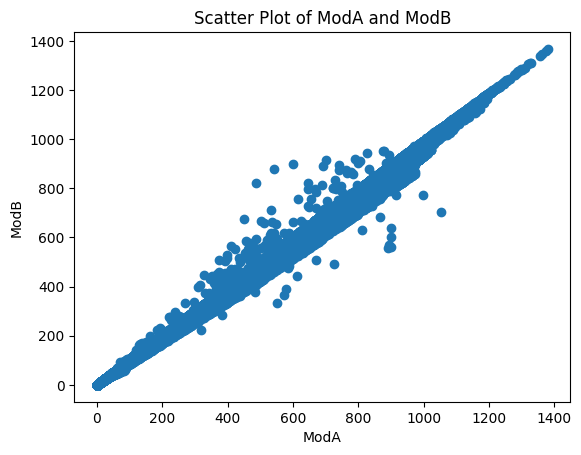

In [16]:
#scatter plot for ModA and ModB
plt.scatter(togoData['ModA'], togoData['ModB'])
plt.xlabel('ModA')
plt.ylabel('ModB')
plt.title('Scatter Plot of ModA and ModB')
plt.show()

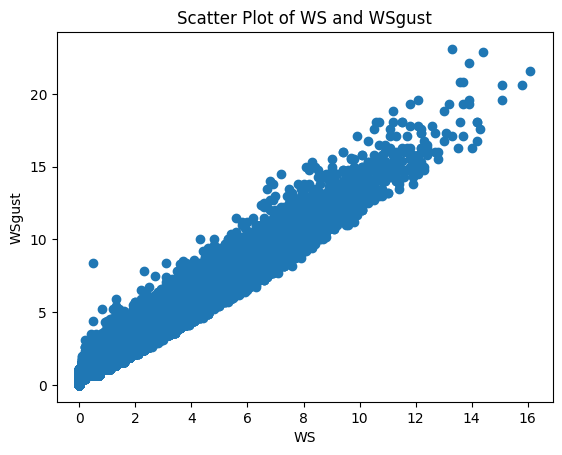

In [17]:
#scatter plot for WS and WSgust
plt.scatter(togoData['WS'], togoData['WSgust'])
plt.xlabel('WS')
plt.ylabel('WSgust')
plt.title('Scatter Plot of WS and WSgust')
plt.show()

Time Series Analysis

In [18]:
togoData["Timestamp"] = pd.to_datetime(togoData["Timestamp"])
togoData.sort_values('Timestamp', inplace=True)
def timeSeries(c):
  plt.plot(togoData['Timestamp'], togoData[c])
  plt.xlabel('Timestamp')
  plt.ylabel(c)
  plt.title(f'Time series for {c}')
  plt.show()

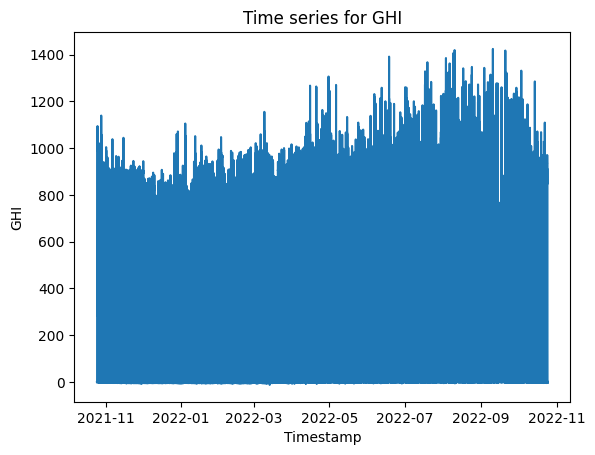

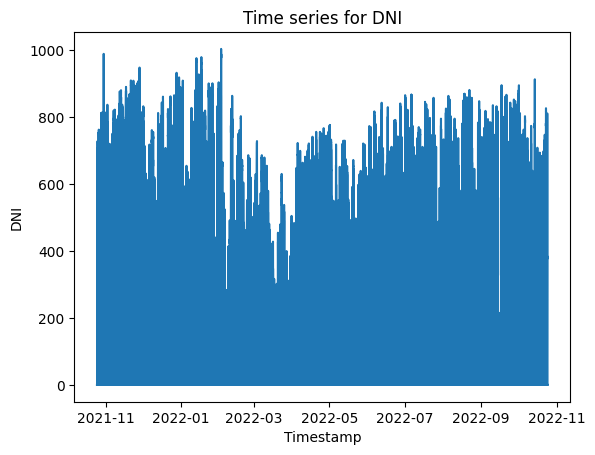

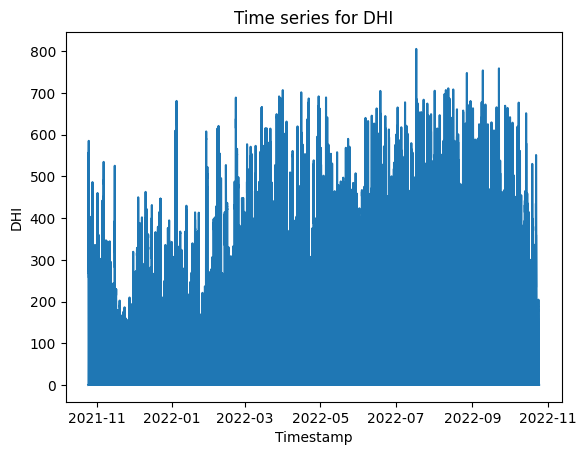

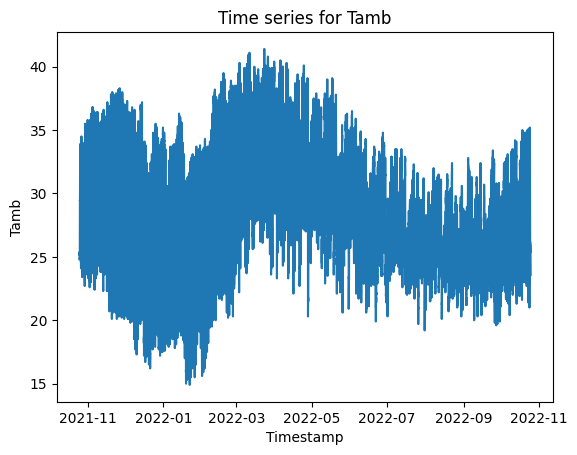

In [19]:
timeSeries("GHI")
timeSeries("DNI")
timeSeries("DHI")
timeSeries("Tamb")

Evaluate the impact of cleaning

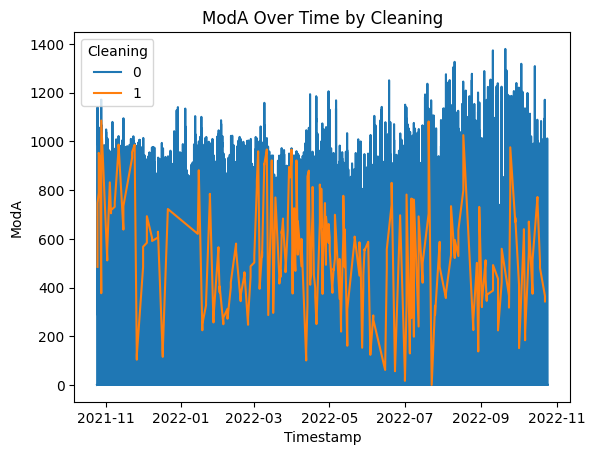

In [20]:
sns.lineplot(x='Timestamp', y='ModA', hue='Cleaning', data=togoData)
plt.title('ModA Over Time by Cleaning')
plt.show()

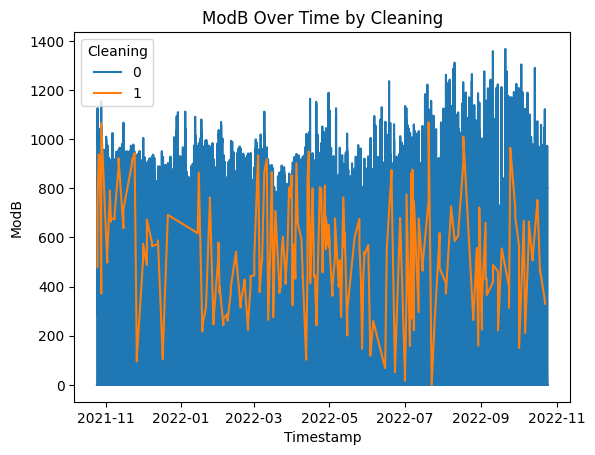

In [21]:
sns.lineplot(x='Timestamp', y='ModB', hue='Cleaning', data=togoData)
plt.title('ModB Over Time by Cleaning')
plt.show()

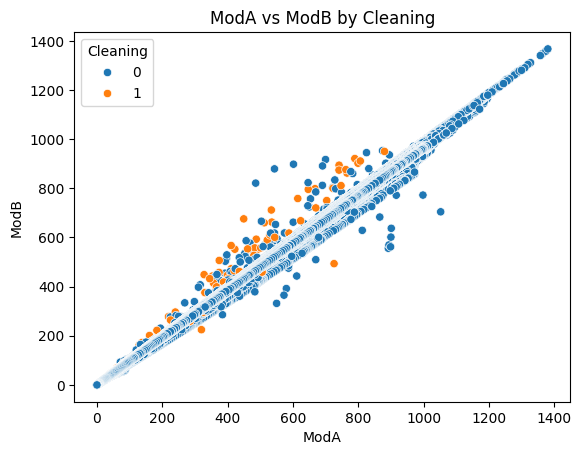

In [22]:
sns.scatterplot(x='ModA', y='ModB', hue='Cleaning', data=togoData)
plt.title('ModA vs ModB by Cleaning')
plt.show()

Correlation Analysis

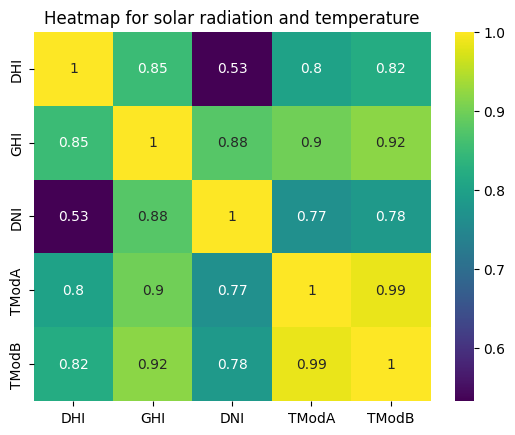

In [23]:
correlation_matrix = togoData[["DHI","GHI","DNI","TModA","TModB"]].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='viridis')
plt.title('Heatmap for solar radiation and temperature')
plt.show()

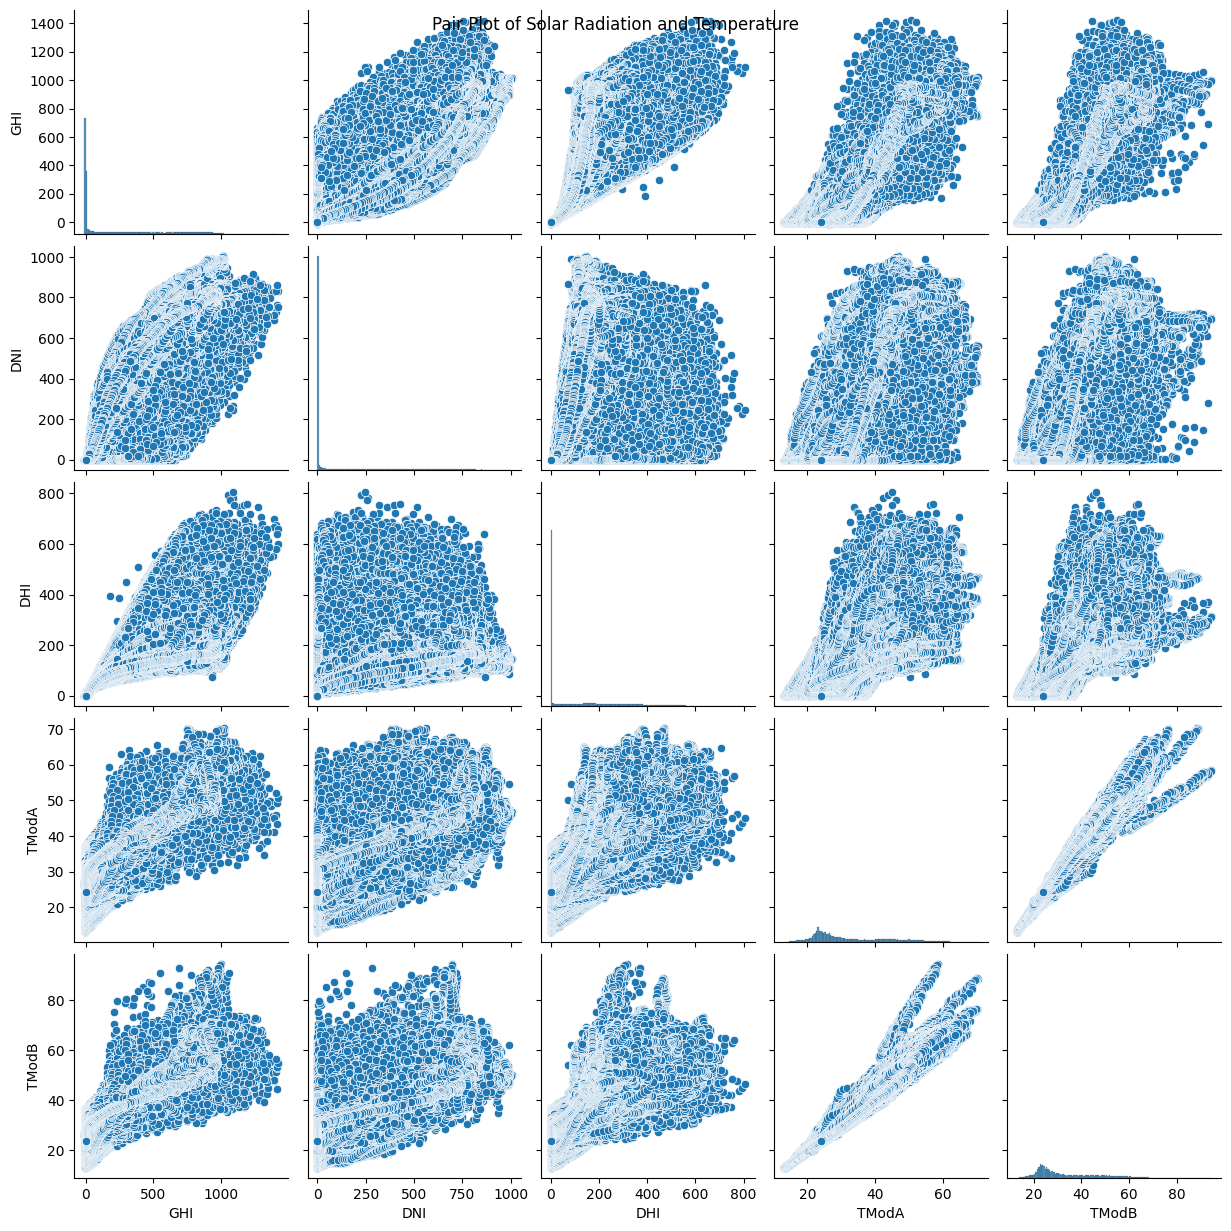

In [24]:
sns.pairplot(togoData[['GHI', 'DNI', 'DHI', 'TModA', 'TModB']])
plt.suptitle('Pair Plot of Solar Radiation and Temperature')
plt.show()

 Investigate the relationship between wind conditions and solar irradiance using scatter matrices.

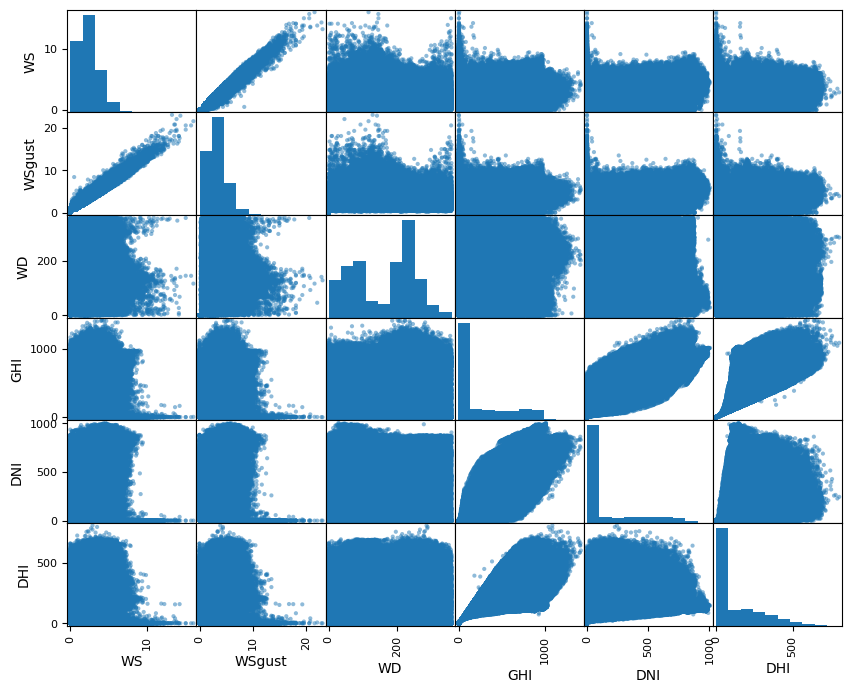

In [36]:
from pandas.plotting import scatter_matrix
scatter_matrix(togoData[['WS', 'WSgust', 'WD', 'GHI', 'DNI', 'DHI']], figsize=(10, 8))
plt.show()

Wind Analysis Using Polar plots

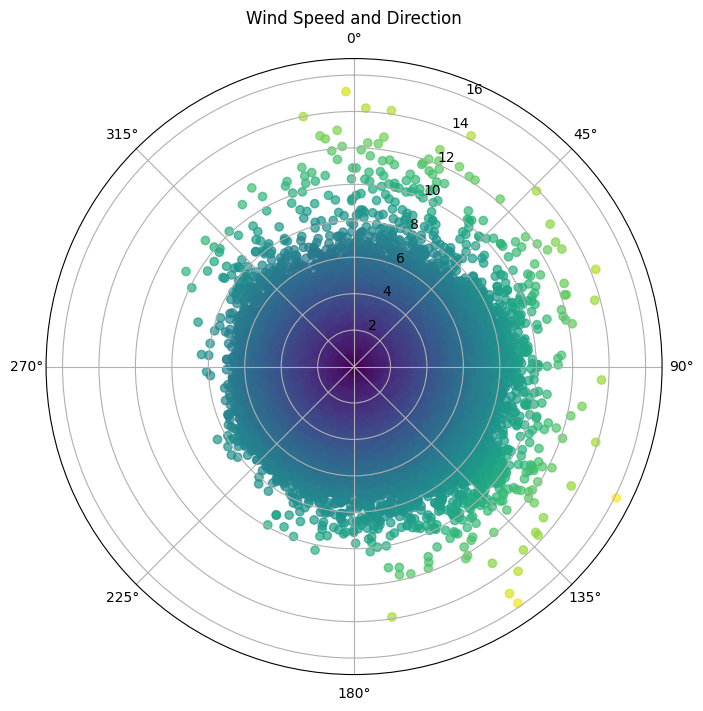

In [27]:
togoData['WD_rad'] = togoData['WD'] * np.pi / 180

norm = plt.Normalize(togoData['WS'].min(), togoData['WS'].max())

plt.figure(figsize=(8, 8))
ax = plt.subplot(111, projection='polar')
ax.scatter(togoData['WD_rad'], togoData['WS'], c=togoData['WS'], cmap="viridis", norm=norm, alpha=0.7)
ax.set_theta_zero_location('N')
ax.set_theta_direction('clockwise')
plt.title('Wind Speed and Direction')
# plt.colorbar(label='Wind Speed (m/s)')
plt.show()

Temperature Analysis using Heatmap and Scatter Plots

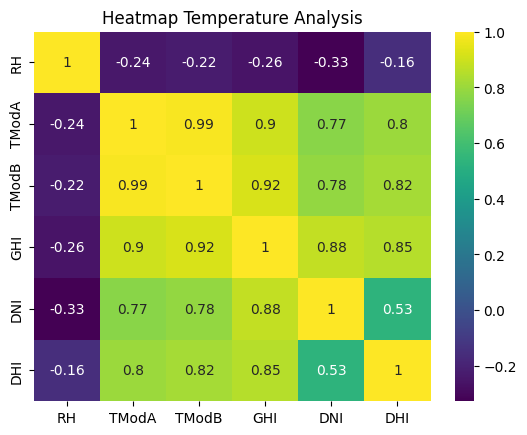

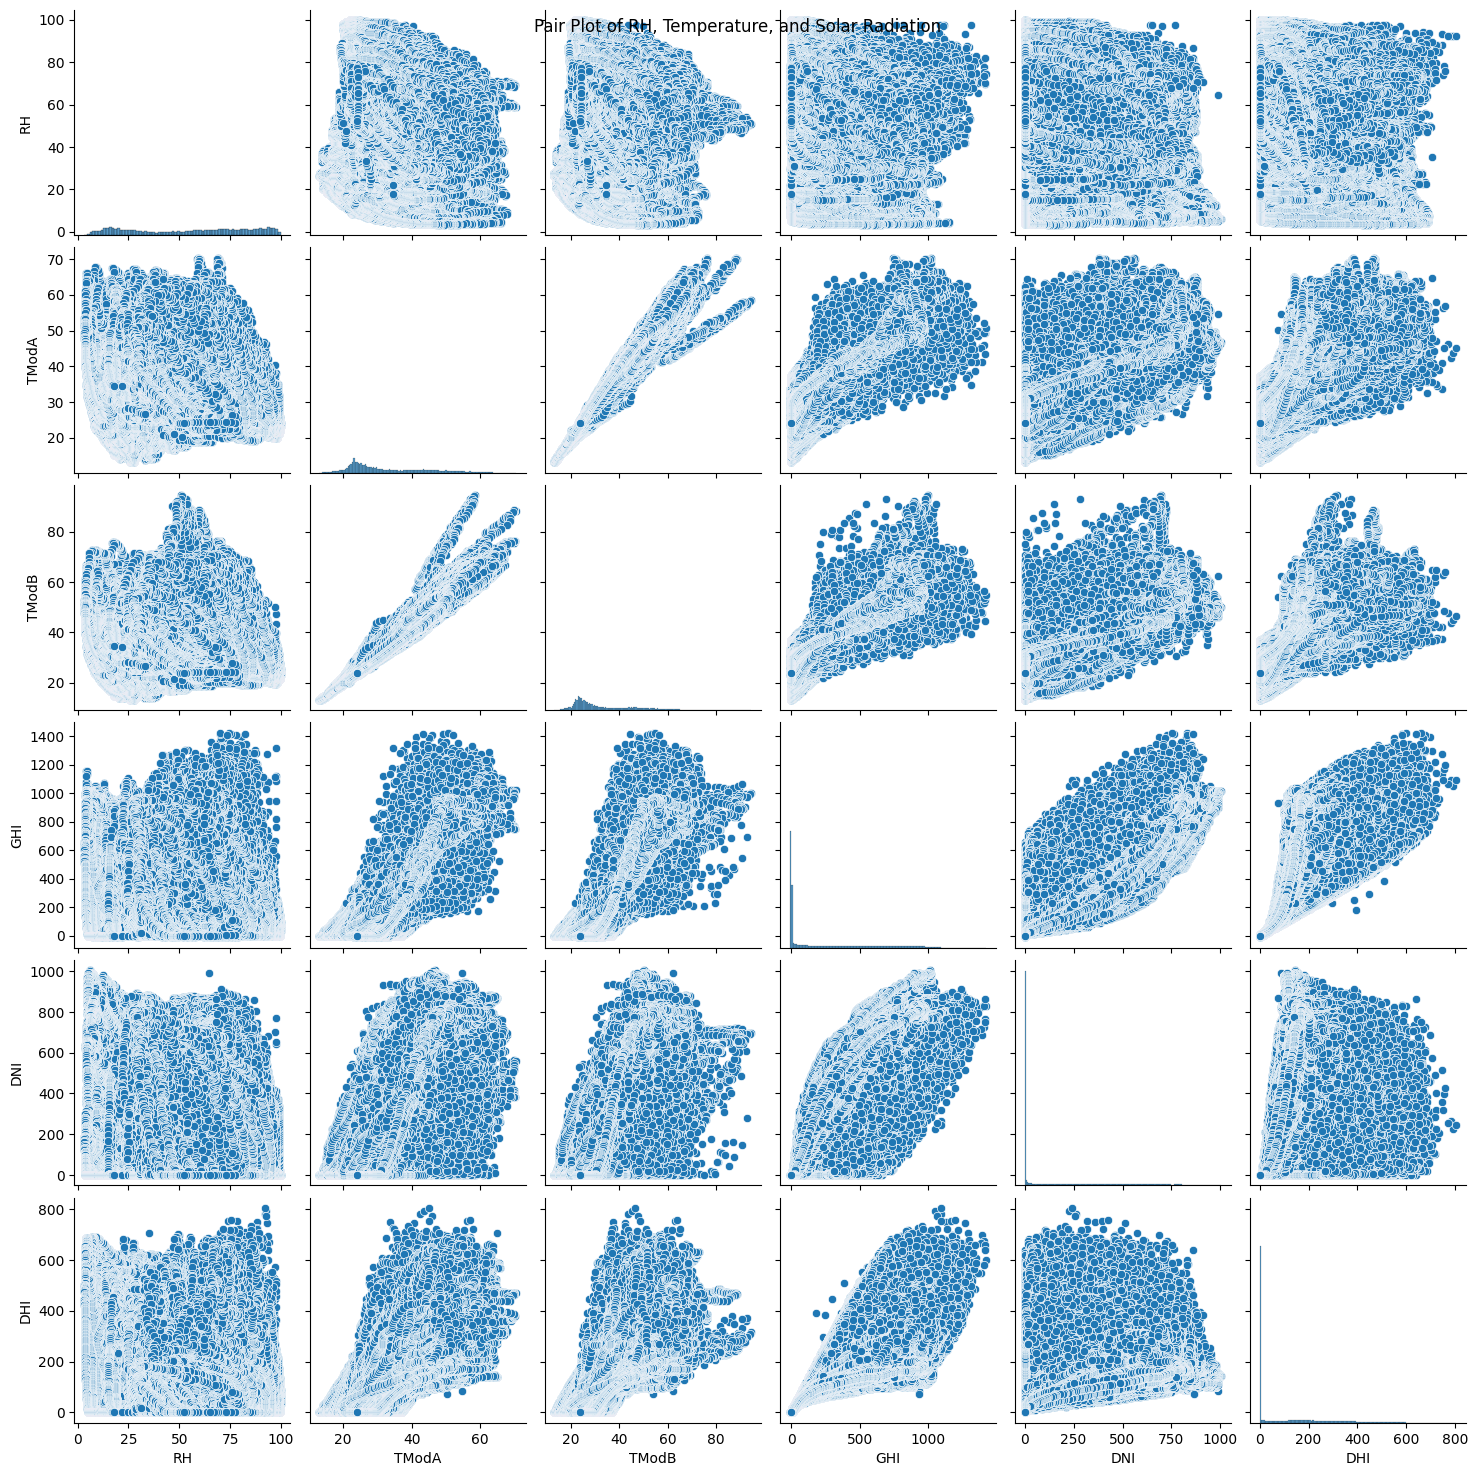

In [28]:
correlation_matrix = togoData[['RH', 'TModA', 'TModB', 'GHI', 'DNI', 'DHI']].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='viridis')
plt.title('Heatmap Temperature Analysis')
plt.show()

sns.pairplot(togoData[['RH', 'TModA', 'TModB', 'GHI', 'DNI', 'DHI']])
plt.suptitle('Pair Plot of RH, Temperature, and Solar Radiation')
plt.show()

Histograms

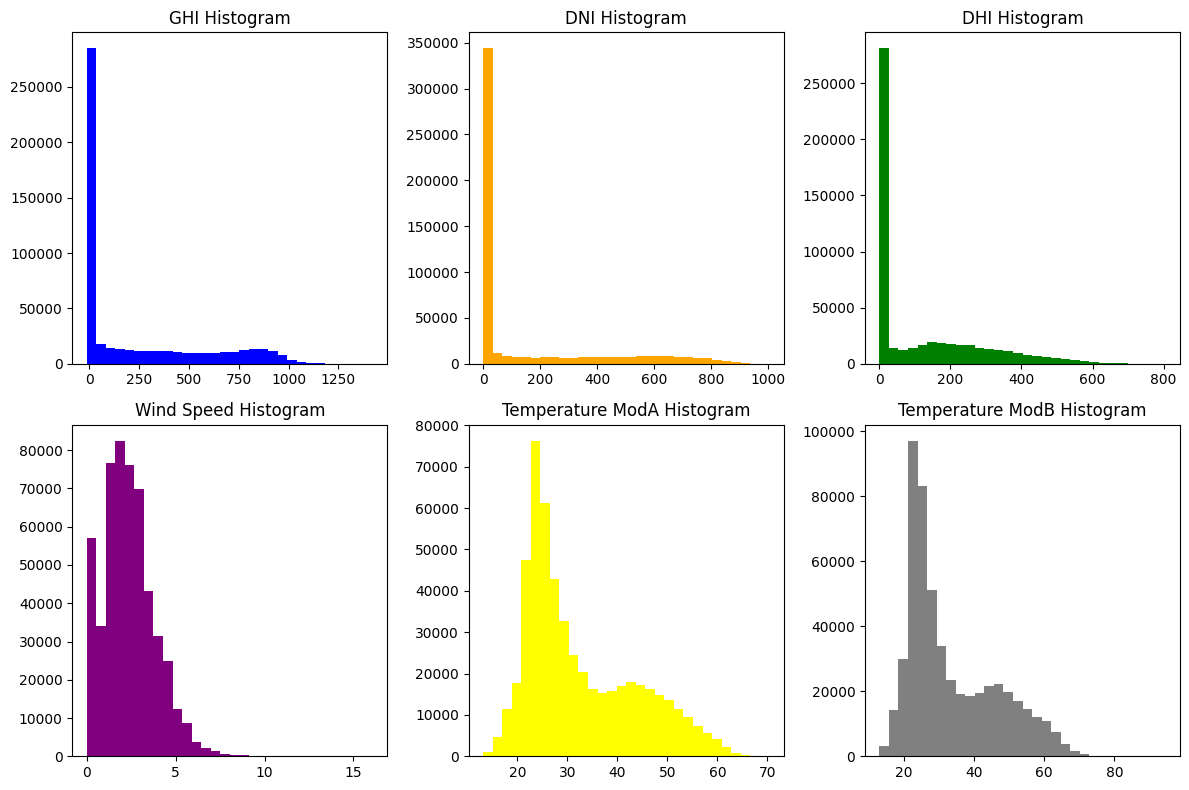

In [29]:
plt.figure(figsize=(12, 8))

plt.subplot(2, 3, 1)
plt.hist(togoData['GHI'], bins=30, color='blue')
plt.title('GHI Histogram')

plt.subplot(2, 3, 2)
plt.hist(togoData['DNI'], bins=30, color='orange')
plt.title('DNI Histogram')

plt.subplot(2, 3, 3)
plt.hist(togoData['DHI'], bins=30, color='green')
plt.title('DHI Histogram')

plt.subplot(2, 3, 4)
plt.hist(togoData['WS'], bins=30, color='purple')
plt.title('Wind Speed Histogram')

plt.subplot(2, 3, 5)
plt.hist(togoData['TModA'], bins=30, color='yellow')
plt.title('Temperature ModA Histogram')

plt.subplot(2, 3, 6)
plt.hist(togoData['TModB'], bins=30, color='gray')
plt.title('Temperature ModB Histogram')

plt.tight_layout()
plt.show()

Z-Score Analysis

In [30]:
columns = ["GHI", "DNI", "DHI", "WS", "TModA", "TModB","ModA" , "ModB"]
z_scores = (togoData[columns] - togoData[columns].mean()) / togoData[columns].std()

print(z_scores)

             GHI       DNI       DHI        WS     TModA     TModB      ModA  \
0      -0.718858 -0.602727 -0.743955 -1.003709 -0.704143 -0.716041 -0.712609   
1      -0.718858 -0.602727 -0.743955 -0.866973 -0.704143 -0.716041 -0.712609   
2      -0.718858 -0.602727 -0.743955 -0.798605 -0.704143 -0.716041 -0.712609   
3      -0.718548 -0.602727 -0.743955 -0.798605 -0.704143 -0.716041 -0.712609   
4      -0.718548 -0.602727 -0.743955 -0.730237 -0.704143 -0.716041 -0.712609   
...          ...       ...       ...       ...       ...       ...       ...   
525595 -0.717308 -0.602727 -0.743955 -1.619024 -0.740512 -0.747366 -0.712609   
525596 -0.717618 -0.602727 -0.743955 -1.619024 -0.740512 -0.747366 -0.712609   
525597 -0.717928 -0.602727 -0.743955 -1.619024 -0.749605 -0.755198 -0.712609   
525598 -0.718238 -0.602727 -0.743955 -1.619024 -0.758697 -0.763029 -0.712609   
525599 -0.718548 -0.602727 -0.743955 -1.619024 -0.758697 -0.763029 -0.712609   

            ModB  
0      -0.713041  
1

Bubble charts

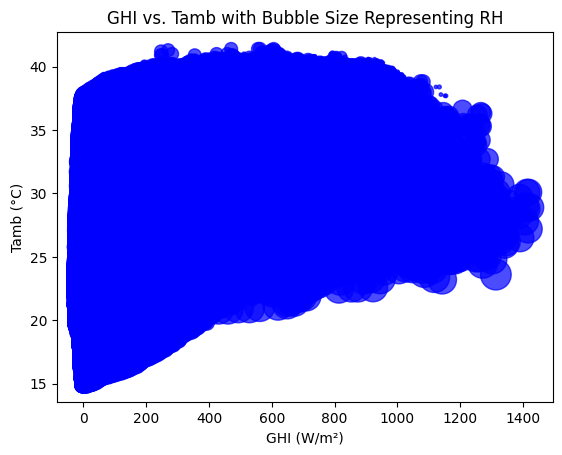

In [31]:
# Normalize the bubble size variable
normalized_rh = (togoData['RH'] - togoData['RH'].min()) / (togoData['RH'].max() - togoData['RH'].min())

plt.scatter(togoData['GHI'], togoData['Tamb'], s=normalized_rh * 500, alpha=0.7, c='blue')
plt.xlabel('GHI (W/m²)')
plt.ylabel('Tamb (°C)')
plt.title('GHI vs. Tamb with Bubble Size Representing RH')
plt.show()

Data Cleaning

In [32]:
#Looking for missing values
togoData.isnull().sum()

Timestamp             0
GHI                   0
DNI                   0
DHI                   0
ModA                  0
ModB                  0
Tamb                  0
RH                    0
WS                    0
WSgust                0
WSstdev               0
WD                    0
WDstdev               0
BP                    0
Cleaning              0
Precipitation         0
TModA                 0
TModB                 0
Comments         525600
WD_rad                0
dtype: int64

In [33]:
togoData = togoData.drop(["Comments"], axis=1)

In [34]:
togoData.head()

Timestamp  GHI  DNI  DHI  ModA  ModB  Tamb    RH   WS  WSgust  \
0 2021-10-25 00:01:00 -1.3  0.0  0.0   0.0   0.0  24.8  94.5  0.9     1.1   
1 2021-10-25 00:02:00 -1.3  0.0  0.0   0.0   0.0  24.8  94.4  1.1     1.6   
2 2021-10-25 00:03:00 -1.3  0.0  0.0   0.0   0.0  24.8  94.4  1.2     1.4   
3 2021-10-25 00:04:00 -1.2  0.0  0.0   0.0   0.0  24.8  94.3  1.2     1.6   
4 2021-10-25 00:05:00 -1.2  0.0  0.0   0.0   0.0  24.8  94.0  1.3     1.6   

   WSstdev     WD  WDstdev   BP  Cleaning  Precipitation  TModA  TModB  \
0      0.4  227.6      1.1  977         0            0.0   24.7   24.4   
1      0.4  229.3      0.7  977         0            0.0   24.7   24.4   
2      0.3  228.5      2.9  977         0            0.0   24.7   24.4   
3      0.3  229.1      4.6  977         0            0.0   24.7   24.4   
4      0.4  227.5      1.6  977         0            0.0   24.7   24.4   

     WD_rad  
0  3.972369  
1  4.002040  
2  3.988077  
3  3.998549  
4  3.970624

In [35]:
togoData.isnull().sum()

Timestamp        0
GHI              0
DNI              0
DHI              0
ModA             0
ModB             0
Tamb             0
RH               0
WS               0
WSgust           0
WSstdev          0
WD               0
WDstdev          0
BP               0
Cleaning         0
Precipitation    0
TModA            0
TModB            0
WD_rad           0
dtype: int64